<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/modelos_secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

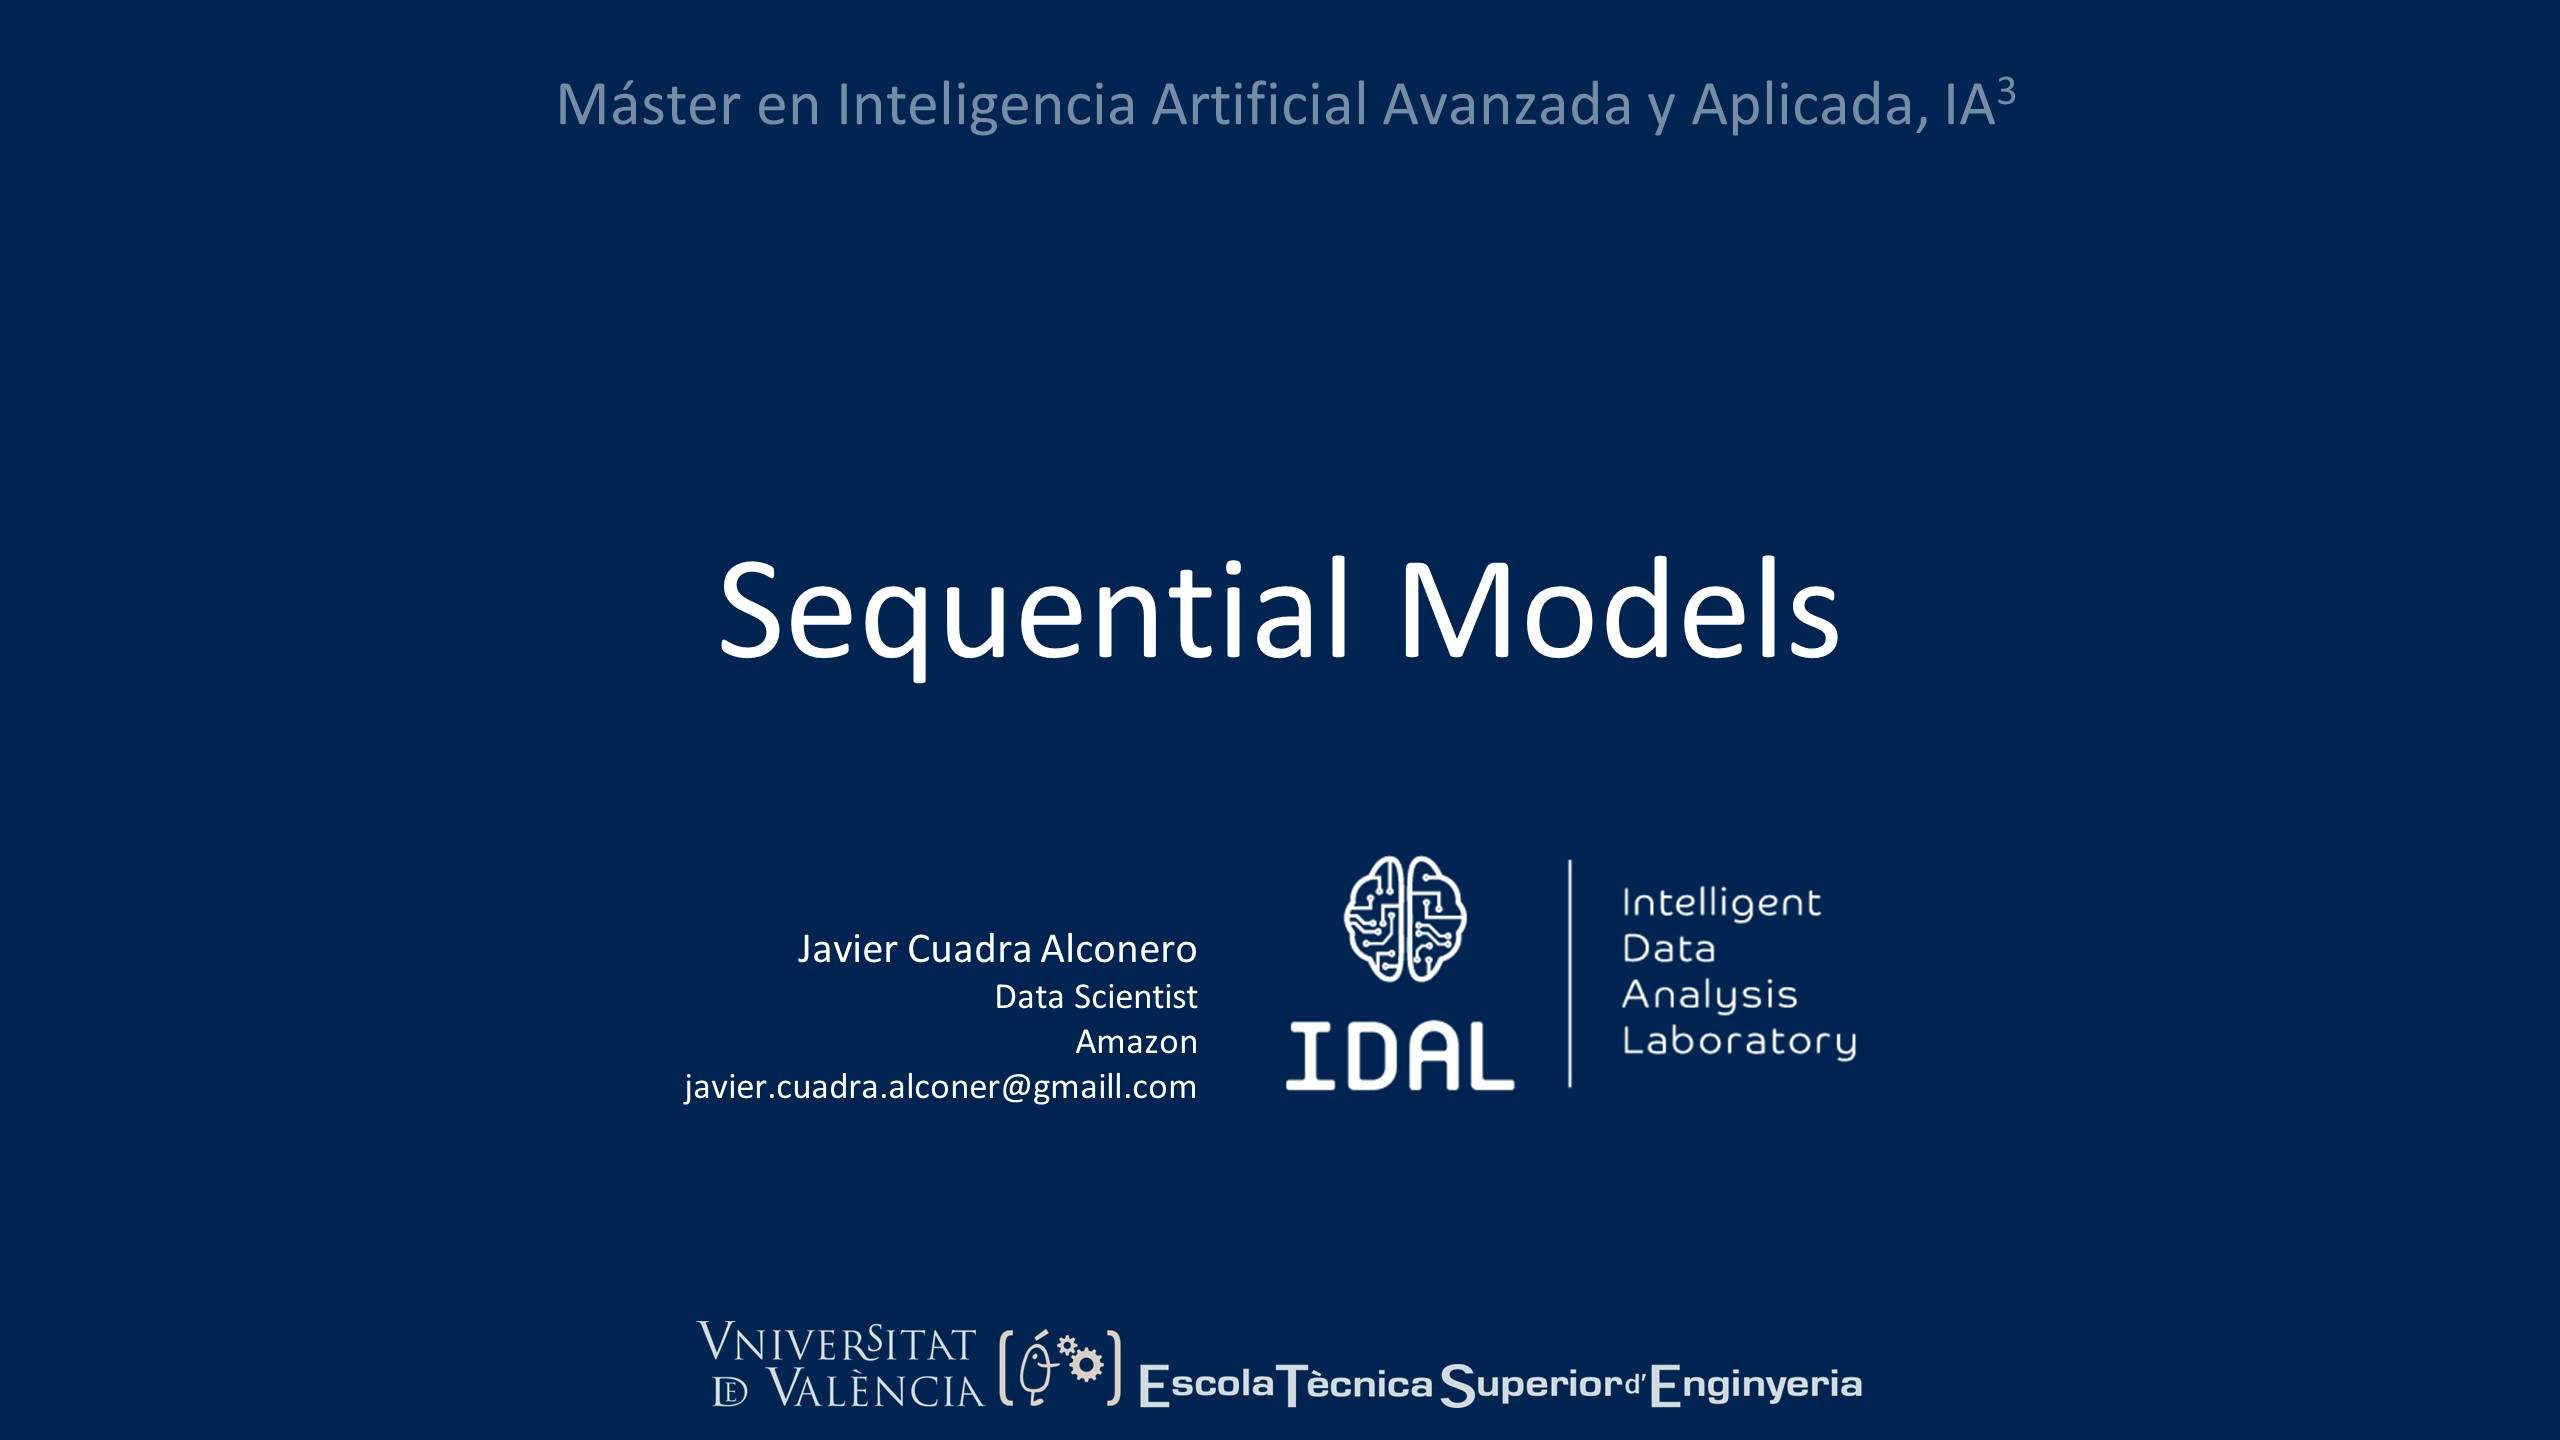

En este capítulo vamos a estudiar los modelos secuenciales y su evolución más reciente la atención. Los modelos secuenciales solucionan el problema de codificar secuencias en redes de neuronas. Las dependencias temporales o posicionales que se producen en las secuencias son un reto a la hora de codificarlas utilizando una arquitectura de redes de neuronas común. Por este motivo se desarrollaron arquitecturas que pudieran tener en cuenta la posición y la temporalidad.

Una recurrent neural network (RNN) es una red de neuronas cuyas capas se encuentran "enrrolladas".

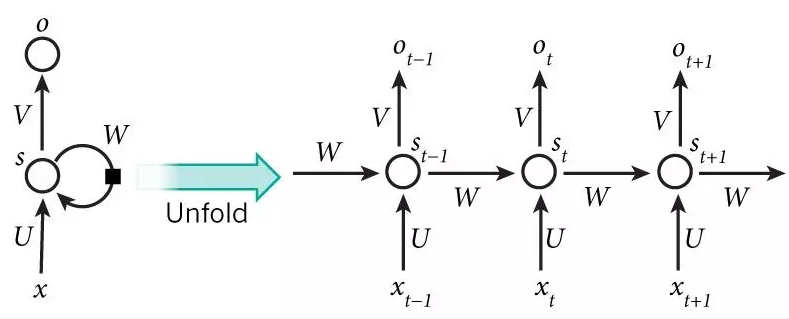

Cada una de las capas "desenrrolladas" se denomina como celda.

La dependencia temporal/posicional de estas redes de neuronas se consigue concatenando las entradas de la celda actual (x) con la activación de la celda anterior (s). De modo que la activación en cada celda sigue la siguiente ecuación:

$s_t = \sigma([x_t|s_{t-1}]*W + b)$

De modo que cada celda es capaz de tener en cuenta la información codificada en la celda anterior.

In [ ]:
# Ejemplo de [x_t|s_t-1]
import numpy as np
import pandas as pd
x = pd.DataFrame(np.random.normal(size=(10,10)))
s_t_1 = pd.DataFrame(np.random.normal(size=(10,10)))

In [ ]:
pd.concat((x,s_t_1), axis=1)

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
0,1.947019,1.054759,1.018341,0.024976,-1.761701,0.916770,1.457928,-0.468792,0.120645,0.917387,-0.800242,0.856734,2.329129,-0.177042,-1.431367,0.332770,-0.401902,0.048235,0.278000,0.248474
1,-0.109649,-0.937356,-0.252495,-0.257431,0.260737,0.311202,3.478350,1.596190,-0.207147,2.443984,0.550679,-0.480389,-0.886789,0.663922,0.341173,-1.003378,-1.338879,0.322753,-0.933960,0.460514
2,0.393421,-0.465012,0.550905,0.762624,-0.226113,-2.324567,0.283446,0.744522,-0.075793,0.149438,0.431588,-0.601339,0.844739,-0.542493,1.388707,-0.681832,-0.313719,-0.470238,1.458276,-0.056428
3,-1.323102,-0.036591,-1.699303,-0.466876,0.890458,-0.014152,-1.123896,2.411042,-1.087585,-0.038114,-0.444506,1.210863,0.397262,-0.264846,-1.919673,-0.512033,1.878722,-0.168354,0.975344,-0.797849
4,-0.523199,-0.673922,-0.564950,-0.991182,-1.608422,-1.118308,-1.079981,-2.447250,0.171196,1.239700,0.776505,-1.497797,-1.021301,-1.295572,-0.270890,2.156832,0.443628,-0.288051,0.429608,0.904673
5,0.981420,1.126542,2.689144,0.483592,2.324635,1.532199,1.394718,-1.309678,0.643938,0.167160,1.316192,-0.569539,0.873240,0.980986,-1.788930,0.644136,1.332333,1.879938,1.487231,1.221121
6,-0.455989,-0.000587,0.880022,0.224753,0.535542,-0.496432,-1.584642,-0.171221,-1.246460,-0.309412,0.757850,-1.330076,-1.105809,-1.394504,2.287538,-1.028180,-0.691004,2.865408,-1.402390,0.563135
7,1.547661,0.467743,-0.064495,0.192392,0.912050,-0.049207,0.465539,0.501020,0.673398,0.113976,0.458974,0.887281,0.396199,2.883501,0.565052,0.325232,-0.675521,-0.251921,1.016343,-1.100846
8,-0.020161,0.453443,-0.362307,0.433674,-0.880235,-0.285380,-0.485084,1.125357,0.206845,-0.327081,0.112147,-1.235098,1.770284,1.898838,-1.934942,1.568098,1.305499,0.888290,-1.542455,-1.309599
9,-0.319450,-0.263148,0.052767,0.923476,0.073577,0.524617,1.452168,0.126414,-0.594732,-0.334270,0.272322,1.085548,1.015919,-1.029243,0.312001,-0.434087,0.735542,1.595581,0.200832,1.333403


# Pregunta para la clase

¿Qué problema puede presentar el modelo definido anteriormente?

# LSTM & GRU

Para solventar el problema de codificar secuencias de determinada longitud se desarrollan los modelos LSTM y GRU.

La gran aportación de estos modelos fue la adición de puertas lógicas a la celda que permitan codificar la información de anteriores celdas. Los modelos LSTM y GRU son capaces de añadir o restar importancia a la información procedente de la celda anterior.

La celda LSTM tiene la siguiente estructura:

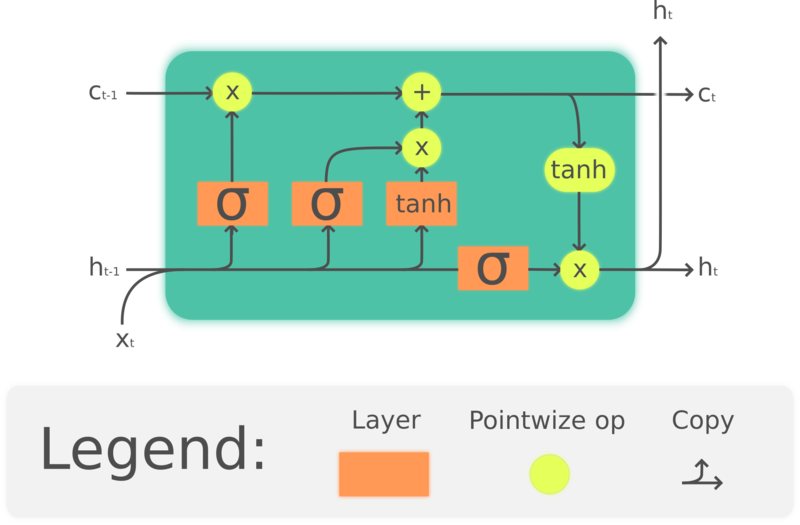



Y las ecuaciones que gobiernan cada una de sus puertas lógicas son:
- Sigmoides:
  - Forget gate: Decide cuanta información del estado pasado se tendrá en cuenta:

    $f_t = \sigma(W_f[x_t|h_{t-1}]+b_f)$
  - Input gate: Decide cuanta información del estado actual se tendrá en cuenta:

    $i_t = \sigma(W_i[x_t|h_{t-1}]+b_i)$
  - Output gate: Decide cuanta información de la celda actual se pasará a la siguiente celda:

    $o_t = \sigma(W_o[x_t|h_{t-1}]+b_o)$

- Tanh
  - $C_0 = tanh(W_c[x_t|h_{t-1}]+b_c)$
  - $C_t = C_{t-1}*f_t + C_0*i_t$
  - $h_t = tanh(C_t*W_{c_t}) * o_t$
  
Los valores obtenidos de las funciones sigmoidales permiten ponderar los valores actuales ($C_0$), pasados ($C_{t-1}$) y la salida $h_t$. Si os percatáis, en cada celda, la red de neuronas decidirá que información olvidar, que información actualizar (mediante la input gate) y que información del estado total de la celda $C_t$ pasa a la siguiente celda y se toma como salida de la misma.



En el caso de las celdas gru la única diferencia es que las puertas forget e input quedan combinadas en una única ecuación llamada remember gate:

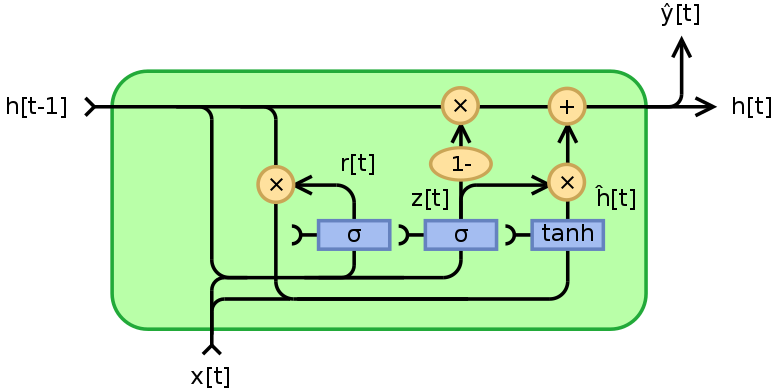

 $r_t = \sigma (W_r[x_t] + U_z[h_{t-1}])$

 $z_t = \sigma (W_z[x_t] + U_z[h_{t-1}])$

 La actualización del estado final $h_t$ viene dada por la siguiente ecuación.

 $h_0 = tanh(W[x_t]+r_t*U[h_{t-1}]+b_r)$

 $h_t = h_{t-1}*(1-z_t) + h_0*z_t$ 



# Embeddings

Concepto de embedding: Un embedding es una representación distribuida en forma de vector de un conjunto de información. Es posible comprimir la información en forma de embedding indepedientemente de su origen. Algunos de los embeddings que habréis manejado hasta la fecha pueden ser:

- bag of words
- tf-idf
- PCA
- UMAP
- Autoencoders

Y en definitiva cualquier algoritmo que que obtenga información dispersa y la comprima en una representación distribuida.

Un embedding si es calculado correctamente, puede aportar un valor clave al desarrollo de vuestros algoritmos.

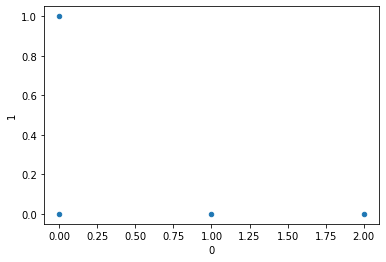

In [ ]:
vocbulario = ["Perro", "Zorro", "Gato", "Agua con gas"]
perro = [1, 0 , 0]
zorro = [0, 1, 0]
gato = [0, 0, 1]
agua_con_gas = [2, 0, 0]
df=pd.DataFrame([perro,gato,zorro, agua_con_gas])
df.plot(x=0,y=1,kind="scatter")

# ¿Por qué son importantes los embeddings en NLP?

El lenguaje tiene un profundo significado para los seres humanos. La comunicación de ideas puede ser extremadamente compleja y es necesario generar métodos que permitan concentrar estas ideas complejas en estructuras que sean procesables y puedan convertirse en aplicaciones complejas y útiles.

Repasemos algunos de los embeddings clásicos que se han utilizado durante el curso:

- One hot encoding: El modelo más básico, cada palabra única se codifica como un 1 o un 0 en un vector cuya longitud es el vocabulario.

- BoW (Bag of Words): Similar al modelos anterior solo que se cuenta la frecuencia de cada palabra

- TF-IDF: Evolución del bag of words que no considera únicamente la frecuencia global del término si no también la frecuencia relativa con la que aparece en un documento en particular

No debemos subestimar estas estrategias de codificar el texto, pues son capaces de resolver algunos problemas básicos.





# Neural Embeddings

Los embeddings neuronales son representaciones distribuídas que han sido calculadas utilizando algún tipo de red de neuronas. Existen multitud de algoritmos para obtener estas representaciones siendo algunos de los más populares, word2vec, doc2vec, elmo y bert.

Generalmente este tipo de algoritmos se entrenan sobre un corpus de texto que contenga millones de documentos con el objetivo de capturar el significado o multiples significados de cada término en un lenguaje.

Podríamos pensar que el conocimiento adquirido por estos algoritmos puede ser suficiente para resolver multitud de tareas en procesado del lenguaje natural y en efecto los embeddings que pueden extraerse de los algoritmos más potentes como elmo y bert pueden resolver tareas complejas. Sin embargo, aún es posible reentrenar estos embeddings utilizando transfer learning para adecuar los vectores generados a la tarea que se pretende resolver.

Existen diferentes formas de realizar este entrenamiento, por ejemplo, sería posible reentrenar el modelo completo junto a vuestras capas de clasificación o regresión. Otra alternativa, que vamos a estudiar en este momento, es utilizar una embedding layer.

# Embedding Layer

Una embedding layer es una capa conformada por una matriz de pesos. Esta matriz de pesos posee las siguientes dimensiones:

$ W_{embeddings} = [embdim, nterms] $

El número de filas corresponde con la dimensión del embedding que se pretende calcular. Este valor es un hiperparámetro que suele definirse en el momento del entrenamiento del modelo de embeddings. El número de columnas se corresponde con el número de términos en vuestro vocabulario. 

La entrada a esta embedding layer será una secuencia de integers que harán referencia al embedding correspondiente a cada término de la secuencia.

Veamos un ejemplo:

In [ ]:
from gensim.utils import tokenize
from gensim.corpora.dictionary import Dictionary
import tensorflow.keras as keras
import numpy as np

In [ ]:
dataset = ["_", "Hola buenas tardes", "Me llamo Javi", "Mi gato se llama Google"]
# El guión bajo nos servirá como caracter especial para el padding
tokens = [list(tokenize(doc)) for doc in dataset]
dict_ids = Dictionary(tokens, )

In [ ]:
tokens

[['_'],
 ['Hola', 'buenas', 'tardes'],
 ['Me', 'llamo', 'Javi'],
 ['Mi', 'gato', 'se', 'llama', 'Google']]

In [ ]:
dict(dict_ids)

{0: '_',
 1: 'Hola',
 2: 'buenas',
 3: 'tardes',
 4: 'Javi',
 5: 'Me',
 6: 'llamo',
 7: 'Google',
 8: 'Mi',
 9: 'gato',
 10: 'llama',
 11: 'se'}

In [ ]:
# El método doc2idx nos permite extraer los integers de nuestro diccionario
dict_ids.doc2idx(tokens[3])

[8, 9, 11, 10, 7]

In [ ]:
inputs_embeddings = [dict_ids.doc2idx(toks) for toks in tokens]
inputs_embeddings

[[0], [1, 2, 3], [5, 6, 4], [8, 9, 11, 10, 7]]

In [ ]:
inp = keras.layers.Input(shape=(5))
emb_layer = keras.layers.Embedding(12, 5)
embeddings = emb_layer(inp)
model = keras.Model(inputs=inp, outputs=embeddings)

In [ ]:
# De forma común querremos que todas las secuencias tengan la misma longitud
# Necesitamos realizar padding sobre las secuencias para conseguir esto
# En este ejemplo querremos que todas tengan un valor de 5 (el máximo de nuestro ejemplo)
padding_inputs = list()
for inps in inputs_embeddings[1:]:
  diff = 5 - len(inps)
  pad_array = np.pad(inps, pad_width=(diff, 0))
  padding_inputs.append(pad_array)

In [ ]:
padding_inputs[1].reshape(1,5)

array([[0, 0, 5, 6, 4]])

In [ ]:
padding_inputs[2]

array([ 8,  9, 11, 10,  7])

In [ ]:
seq = model.predict(padding_inputs[2].reshape(1,5))

In [ ]:
seq

array([[[ 0.01454438,  0.02353295,  0.02791819, -0.01943468,
         -0.01598056],
        [-0.04888621, -0.0043056 , -0.00440706,  0.01810156,
          0.00483681],
        [ 0.00032962,  0.02060233,  0.03681267, -0.02067607,
         -0.04247615],
        [-0.01095195, -0.006006  , -0.04429857,  0.04544157,
          0.00548664],
        [ 0.01896833,  0.03935119,  0.03764851,  0.02089293,
          0.00388498]]], dtype=float32)

In [ ]:
seq.shape

(1, 5, 5)

Como podéis percataros la capa de embedding ha generado  una secuencia de embeddings (sin entrenar) que posteriormente podría servir de entrada para un modelo secuencial. Estos embeddings aprenderán junto al ejercicio de clasificación o regresión que diseñéis en una red de neuronas. 

Al igual que en el resto de capas, podéis cargar vuestros propios pesos en la misma, por lo que si tenéis un conjunto de embeddings preentrenados pueden ser cargados en esta capa y servir como punto de partida para la tarea de aprendizaje que diseñéis.

# Ejercicio, resorved el siguiente ejercicio de clasificación utilizando una capa de embeddings y un modelo de keras. Para ello:

- Preprocesad el texto, tokenizad, generad las secuencias de integers y añadid el padding que consideréis apropiado. Recordad añadir un carácter especial que sirva de embedding para el padding.

- Generad un modelo de redes de neuronas con una capa de entrada, una capa de embeddings, una capa lstm, y una capa densa conectada a un clasificador softmax.

- Entrenad el modelo por 100 épocas. Evaluad el resultado, dibujad las curvas de aprendizaje de train y test. Para ello cuando realicéis el entrenamiento del modelo extraed la historia history = model.fit()

Disponéis de dos columnas de texto en el dataset, una llamada reviewText y otra llamada summary. Summary es una columna con texto resumido, os recomiendo que utilicéis la columna summary para comenzar este experimento.

La columna target es la columna overall que contiene el valor numérico que queréis predecir. Podéis plantear el problema como una clasificación o una regresión. Si lo planteáis como una regresión sustituid el clasificador softmax por una neurona lineal.

Pensad que el entrenamiento que vamos a realizar es breve y el conjunto de datos no es muy extenso. No intentéis conseguir un resultado perfecto, más bien apuntad a alcanzar un modelo que funcione rápidamente.

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments_5.json.gz
!pip install simplejson

--2021-05-15 11:08:11--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39356138 (38M) [application/octet-stream]
Saving to: ‘Musical_Instruments_5.json.gz.1’

Musical_Instruments 100%[===================>]  37.53M  12.5MB/s    in 3.0s    

2021-05-15 11:08:14 (12.5 MB/s) - ‘Musical_Instruments_5.json.gz.1’ saved [39356138/39356138]



In [ ]:
import gzip
import json
import pandas as pd
filename_ = "/content/Musical_Instruments_5.json.gz"
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)
dataset = parse(filename_)
df = pd.DataFrame(dataset)
df = df.loc[:, ["overall", "summary"]]
df.dropna(inplace=True)
df = df
df.isna().sum()

overall    0
summary    0
dtype: int64

In [ ]:
# Preprocesado
summary = df["summary"]
tokens_summary = [list(tokenize(doc)) for doc in summary]
max_length = max([len(toks) for toks in tokens_summary])

# Vocabulario
list_pad_token = [["_"]]
list_pad_token.extend(tokens_summary)
dict_idx = Dictionary(list_pad_token)

# Padding 
inputs_embeddings = [dict_idx.doc2idx(toks) for toks in list_pad_token]
padding_inputs_2 = list()
for inps in inputs_embeddings[1:]:
  diff = max_length - len(inps)
  pad_array = np.pad(inps, pad_width=(0, diff))
  padding_inputs_2.append(pad_array)
features = pd.DataFrame(padding_inputs_2)
labels = pd.get_dummies(df["overall"])

In [ ]:
# Modelo de Keras
inp = keras.layers.Input(shape=(max_length))
embeddings = keras.layers.Embedding(len(dict_idx)+1,25)(inp)
sequences = keras.layers.LSTM(60, return_sequences=True)(embeddings)
state = keras.layers.LSTM(60, return_sequences=False)(sequences)
dense_01 = keras.layers.Dense(300, activation="tanh")(state)
linear = keras.layers.Dense(1, activation="linear")(dense_01)

model = keras.Model(inputs=inp, outputs=linear)
model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 39)]              0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 39, 25)            698175    
_________________________________________________________________
lstm_29 (LSTM)               (None, 39, 60)            20640     
_________________________________________________________________
lstm_30 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dense_28 (Dense)             (None, 300)               18300     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 301       
Total params: 766,456
Trainable params: 766,456
Non-trainable params: 0
____________________________________________________

In [ ]:
# Entrenamiento
model.fit(x=features, y=df["overall"], epochs=20, batch_size=32,
          validation_split=0.2)

Epoch 1/20
5784/5784 [==============================] - 76s 13ms/step - loss: 0.8999 - val_loss: 0.5141
Epoch 2/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.3947 - val_loss: 0.4869
Epoch 3/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.3482 - val_loss: 0.4830
Epoch 4/20
5784/5784 [==============================] - 72s 13ms/step - loss: 0.3103 - val_loss: 0.4932
Epoch 5/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.2834 - val_loss: 0.4878
Epoch 6/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.2582 - val_loss: 0.4991
Epoch 7/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.2367 - val_loss: 0.4918
Epoch 8/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.2267 - val_loss: 0.5065
Epoch 9/20
5784/5784 [==============================] - 73s 13ms/step - loss: 0.2073 - val_loss: 0.4965
Epoch 10/20
5784/5784 [==============================] - 73s 13m

# Bidirectional LSTM & GRU


Muchos de vosotros os habréis percatado que la información en los modelos de lenguaje se encuentra distribuída a lo largo del documento/frase/pieza. El lenguaje, aún siguiendo una secuencia ordenada, distribuye su información en diferentes palabras clave.

Los modelos secuenciales bidireccionales permiten recorrer las secuencias en dos direcciones, la secuencia original y su inversa.

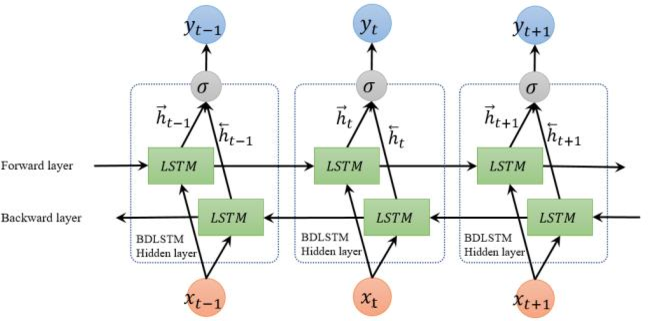

En esencia los modelos bidireccionales se componen de dos redes idénticas que recorren la secuencia en direcciones distintas y concatenan sus salidas. Este tipo de arquitectura puede aplicarse a cualquiera de los modelos secuenciales que hemos aprendido.

# Ejemplo

Construyamos un modelo bidireccional y realicemos un análisis dimensional de sus salidas.


In [ ]:
inp = keras.layers.Input(shape=(5))
emb_layer = keras.layers.Embedding(12, 5)(inp)
states, bi01_h, bi01_c, bi02_h, bi02_c = keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True, return_state=True))(emb_layer)


model = keras.Model(inputs=inp, outputs=[states, bi01_h, bi01_c, bi02_h, bi02_c])

In [ ]:
padding_inputs[0].shape

(5,)

In [ ]:
states, bi01_h, bi01_c, bi02_h, bi02_c = model.predict(padding_inputs[2].reshape(1,5))

In [ ]:
bi02_c

array([[ 0.0025105 , -0.01207674,  0.00942885,  0.01597969,  0.00747616,
        -0.00623283, -0.00124874, -0.011683  ,  0.00596861, -0.01424922]],
      dtype=float32)

In [ ]:
seq.shape

(1, 20)

In [ ]:
seq[0].shape

(20,)

Tal y como esperábamos la dimensión obtenida es de 1 (batch size) por 20 (10 neuronas por dos capas lstm cada una en una dirección),

# Ejercicio

Utilizad la nueva capa bidireccional en el modelo desarrollado anteriormente. Realizad las modificaciones que sean necesarias para ello (no os agobiéis, que es solo poner la  capa bidireccional)

Tened en cuenta que ahora el número de pesos a entrenar es mayor, por lo que el resultado, en un entrenamiento tan corto puede que no sea representativo. Experimentad con este modelo fuera de clase para alcanzar conclusiones.

In [ ]:
# Escribid aquí vuestro código

# Debate en clase

Hemos estudiado/repasado los modelos secuenciales más típicos. Son modelos ampliamente usados en la industria y que pueden aportar buenos resultados dependiendo del problema.

Me gustaría comenzar un pequeño debate con vosotros:

- ¿Cuál creéis que es el punto débil de estos modelos?
- ¿En qué partes de la capa podéis experimentar para generar nuevas arquitecturas?
- ¿Se os ocurre alguna forma de alterar las funciones de activación por defecto?

Leed ahora este post de stackoverflow acerca de como una función de activación relu puede impactar en una predicción de series temporales usando uno de estos modelos.

https://stats.stackexchange.com/questions/444923/activation-function-between-lstm-layers#:~:text=1%20Answer&text=The%20purpose%20of%20the%20Rectified,then%200.0%20is%20simply%20returned.